In [5]:
import os

# Chemin vers votre fichier
chemin_fichier = 'data/T_plats.csv'

# Vérification
if os.path.exists(chemin_fichier):
    print(f"Le fichier existe à {chemin_fichier}")
    df = pd.read_csv(chemin_fichier)
else:
    print(f"Le fichier n'existe pas à {chemin_fichier}")
    print("Dossiers disponibles:", os.listdir())
    if os.path.exists('data'):
        print("Contenu du dossier data:", os.listdir('data'))

Le fichier n'existe pas à data/T_plats.csv
Dossiers disponibles: ['.ipynb_checkpoints', 'data', 'resto.ipynb']
Contenu du dossier data: ['T_plats.xlsx']


Le fichier existe à data/T_plats.xlsx

Aperçu des données:
   Type           Nom Horaire  prix  image
0     1   Thieb Djeun    Jour  2000    NaN
1     2     Mafe Yapp    Soir  2000    NaN
2     3   Mafe Ganaar    Jour  2000    NaN
3     4         C'bon    Soir  2000    NaN
4     6  Soupe Kandja    Jour  2000    NaN
APERÇU DES DONNÉES
--------------------------------------------------
Nombre total de plats: 15

Premières lignes:


,Type,Nom,Horaire,prix,image
0,1,Thieb Djeun,Jour,2000,NaN
1,2,Mafe Yapp,Soir,2000,NaN
2,3,Mafe Ganaar,Jour,2000,NaN
3,4,C'bon,Soir,2000,NaN
4,6,Soupe Kandja,Jour,2000,NaN



STATISTIQUES DES PRIX
--------------------------------------------------


count      15.000000
mean     2793.333333
std      1598.421841
min       500.000000
25%      2000.000000
50%      2000.000000
75%      3500.000000
max      7500.000000
Name: prix, dtype: float64


RÉPARTITION PAR HORAIRE
--------------------------------------------------


Horaire
Soir    10
Jour     5
Name: count, dtype: int64

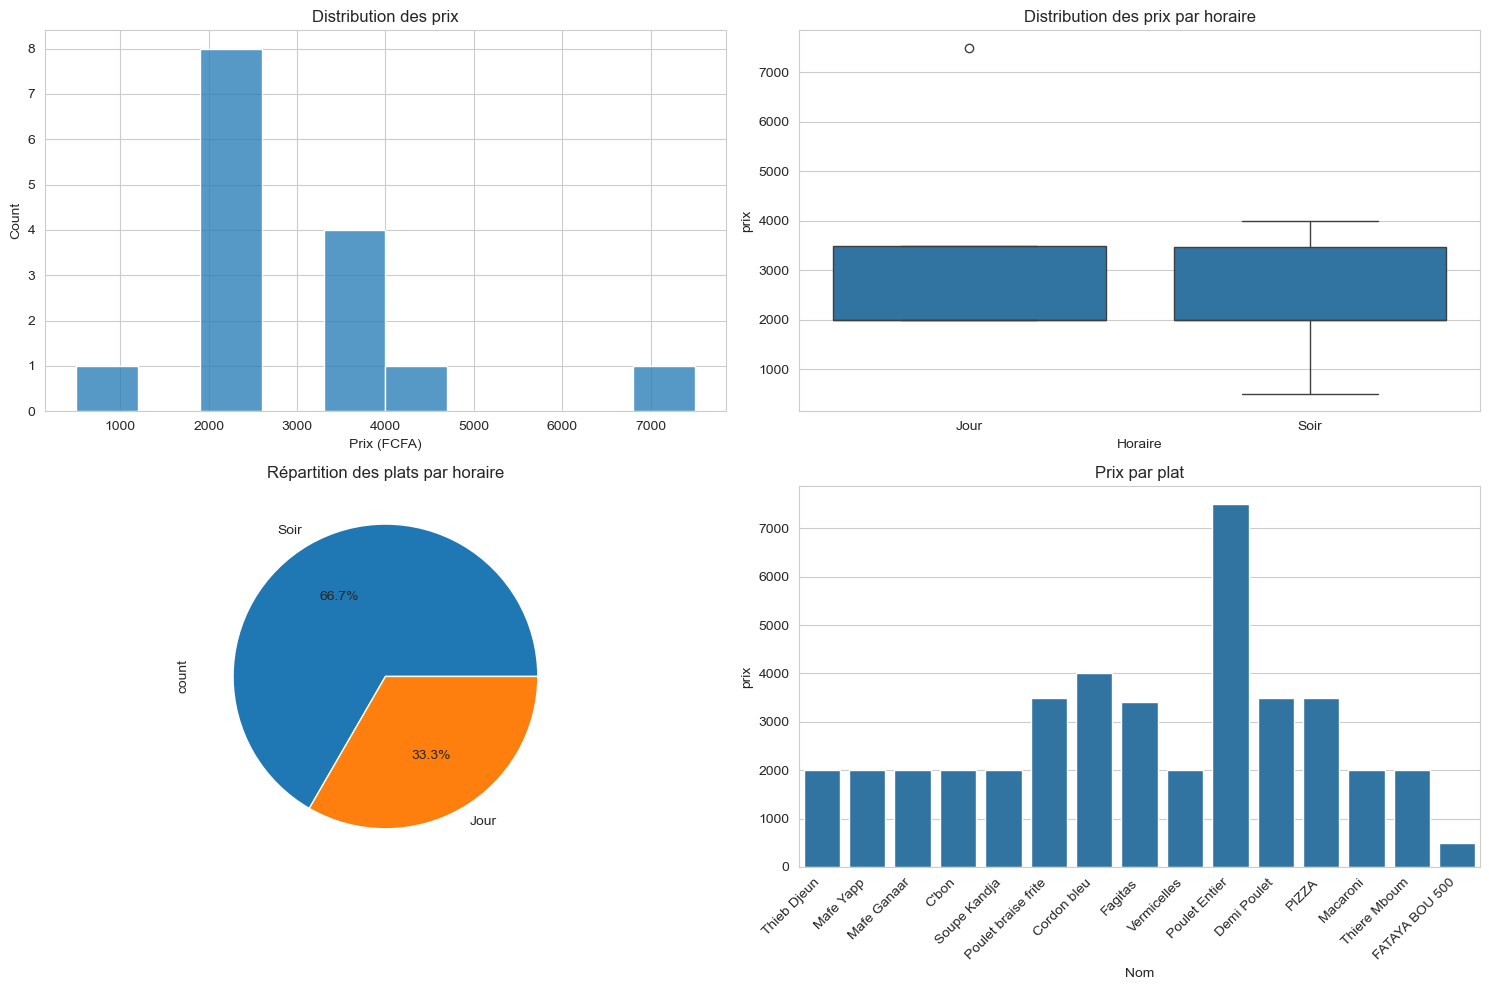

PRIX MOYENS PAR HORAIRE
--------------------------------------------------


,mean,count,min,max
Horaire,,,,
Jour,3400.0,5,2000,7500
Soir,2490.0,10,500,4000



RÉPARTITION PAR CATÉGORIE DE PRIX
--------------------------------------------------


categorie_prix
Standard      8
Premium       5
Économique    1
Luxe          1
Name: count, dtype: int64

In [6]:
# 1. Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de base
plt.style.use('default')
sns.set_style("whitegrid")

# 2. Lecture des données depuis le fichier Excel
chemin_fichier = 'data/T_plats.xlsx'

# Vérification et lecture du fichier
if os.path.exists(chemin_fichier):
    print(f"Le fichier existe à {chemin_fichier}")
    # Utilisation de read_excel au lieu de read_csv
    df = pd.read_excel(chemin_fichier)
else:
    print(f"Le fichier n'existe pas à {chemin_fichier}")
    print("Dossiers disponibles:", os.listdir())
    if os.path.exists('data'):
        print("Contenu du dossier data:", os.listdir('data'))

# Vérification du contenu du DataFrame
print("\nAperçu des données:")
print(df.head())

# Le reste du code pour l'analyse reste le même
def analyse_complete():
    # Aperçu des données
    print("APERÇU DES DONNÉES")
    print("-" * 50)
    print(f"Nombre total de plats: {len(df)}")
    print("\nPremières lignes:")
    display(df.head())
    
    # Statistiques des prix
    print("\nSTATISTIQUES DES PRIX")
    print("-" * 50)
    stats_prix = df['prix'].describe()
    display(stats_prix)
    
    # Analyse par horaire
    print("\nRÉPARTITION PAR HORAIRE")
    print("-" * 50)
    horaires = df['Horaire'].value_counts()
    display(horaires)
    
    # Visualisations
    create_visualizations()

def create_visualizations():
    plt.figure(figsize=(15, 10))
    
    # 1. Distribution des prix
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='prix', bins=10)
    plt.title('Distribution des prix')
    plt.xlabel('Prix (FCFA)')
    
    # 2. Prix moyen par horaire
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='Horaire', y='prix')
    plt.title('Distribution des prix par horaire')
    
    # 3. Répartition des horaires
    plt.subplot(2, 2, 3)
    df['Horaire'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Répartition des plats par horaire')
    
    # 4. Prix des plats (barplot)
    plt.subplot(2, 2, 4)
    sns.barplot(data=df, x='Nom', y='prix')
    plt.xticks(rotation=45, ha='right')
    plt.title('Prix par plat')
    
    plt.tight_layout()
    plt.show()

# Exécution de l'analyse
analyse_complete()

# Analyses supplémentaires
def analyses_supplementaires():
    # Prix moyens par horaire
    print("PRIX MOYENS PAR HORAIRE")
    print("-" * 50)
    moyennes = df.groupby('Horaire')['prix'].agg(['mean', 'count', 'min', 'max'])
    display(moyennes)
    
    # Catégorisation des prix
    df['categorie_prix'] = pd.cut(df['prix'], 
                                 bins=[0, 1000, 2500, 5000, float('inf')],
                                 labels=['Économique', 'Standard', 'Premium', 'Luxe'])
    
    print("\nRÉPARTITION PAR CATÉGORIE DE PRIX")
    print("-" * 50)
    display(df['categorie_prix'].value_counts())

analyses_supplementaires()